## Q.1. Write python code from scratch for JPEG compression for image (lena.jpg) and demonstrate results of each step and also compare final result with OpenCV functions in terms of in terms of RMSE and PSNR (dB).

### Jpeg Compression - Encoding and Decoding wihtout using OPEN CV

In [1]:
import cv2
import numpy as np
import math
import os

from heapq import heappush, heappop, heapify
from collections import defaultdict


#.....................................RLE for Image compression..................................


def get_run_length_encoding(image):
    i = 0
    skip = 0
    stream = []    
    bitstream = ""
    image = image.astype(int)
    while i < image.shape[0]:
        if image[i] != 0:            
            stream.append((image[i],skip))
            bitstream = bitstream + str(image[i])+ " " +str(skip)+ " "
            skip = 0
        else:
            skip = skip + 1
        i = i + 1

    return bitstream

#.....................................RLD for Image Decoding.....................................

def run_len_decode(message):
    message_numpy_array = np.fromstring(message.strip(';'), dtype=int, sep=' ')
    size = message_numpy_array[:2]
    message_numpy_array = message_numpy_array[2:]
    non_zero = [message_numpy_array[i] for i in range(message_numpy_array.shape[0]) if i%2 == 0]
    zero = [message_numpy_array[i] for i in range(message_numpy_array.shape[0]) if i%2 == 1]
    decoded = []
    for i in range(len(non_zero)):
        j = 0
        while j < zero[i]:
            decoded.append(0)
            j +=1
        decoded.append(non_zero[i])
    trailing_zeros = [0]*((size[0]*size[1]) - len(decoded))
    decoded += trailing_zeros
    return np.array(decoded)

In [2]:


#.....................................RLE for Image compression..................................


def get_run_length_encoding(image):
    i = 0
    skip = 0
    stream = []    
    bitstream = ""
    image = image.astype(int)
    while i < image.shape[0]:
        if image[i] != 0:            
            stream.append((image[i],skip))
            bitstream = bitstream + str(image[i])+ " " +str(skip)+ " "
            skip = 0
        else:
            skip = skip + 1
        i = i + 1

    return bitstream

#.....................................RLD for Image Decoding.....................................

def run_len_decode(message):
    message_numpy_array = np.fromstring(message.strip(';'), dtype=int, sep=' ')
    size = message_numpy_array[:2]
    message_numpy_array = message_numpy_array[2:]
    non_zero = [message_numpy_array[i] for i in range(message_numpy_array.shape[0]) if i%2 == 0]
    zero = [message_numpy_array[i] for i in range(message_numpy_array.shape[0]) if i%2 == 1]
    decoded = []
    for i in range(len(non_zero)):
        j = 0
        while j < zero[i]:
            decoded.append(0)
            j +=1
        decoded.append(non_zero[i])
    trailing_zeros = [0]*((size[0]*size[1]) - len(decoded))
    decoded += trailing_zeros
    return np.array(decoded)

In [3]:

#........................................ZigZag function........................................



def zigzag(matrix):
    '''Args: Matrix -- A numpy Matrix

       Output: Numpy 1D-Array-- Elements of matrix in a zigzag pattern '''
    r,c = matrix.shape

    solution = [[] for i in range(r+c -1)]
    sol = []
    for i in range(r):
        for j in range(c):
            sum = i + j
            if(sum%2 == 0):
                solution[sum].insert(0,matrix[i,j])
            else:
                solution[sum].append(matrix[i,j])
    for i in solution:
        for j in i:
            sol.append(j)
    return np.array(sol)

#....................................Inverse-ZigZag function.....................................


def dezigzag(block):
    n_block = np.zeros((8,8))
    n_block[0,0] = block[0,0]
    n_block[0,1] = block[0,1]
    n_block[0,2] = block[0,5]
    n_block[0,3] = block[0,6]
    n_block[0,4] = block[1,6]
    n_block[0,5] = block[1,7]
    n_block[0,6] = block[3,3]
    n_block[0,7] = block[3,4]
    n_block[1,0] = block[0,2]
    n_block[1,1] = block[0,4]
    n_block[1,2] = block[0,7]
    n_block[1,3] = block[1,5]
    n_block[1,4] = block[2,0]
    n_block[1,5] = block[3,2]
    n_block[1,6] = block[3,5]
    n_block[1,7] = block[5,2]
    n_block[2,0] = block[0,3]
    n_block[2,1] = block[1,0]
    n_block[2,2] = block[1,4]
    n_block[2,3] = block[2,1]
    n_block[2,4] = block[3,1]
    n_block[2,5] = block[3,6]
    n_block[2,6] = block[5,1]
    n_block[2,7] = block[5,3]
    n_block[3,0] = block[1,1]
    n_block[3,1] = block[1,3]
    n_block[3,2] = block[2,2]
    n_block[3,3] = block[3,0]
    n_block[3,4] = block[3,7]
    n_block[3,5] = block[5,0]
    n_block[3,6] = block[5,4]
    n_block[3,7] = block[6,5]
    n_block[4,0] = block[1,2]
    n_block[4,1] = block[2,3]
    n_block[4,2] = block[2,7]
    n_block[4,3] = block[4,0]
    n_block[4,4] = block[4,7]
    n_block[4,5] = block[5,5]
    n_block[4,6] = block[6,4]
    n_block[4,7] = block[6,6]
    n_block[5,0] = block[2,4]
    n_block[5,1] = block[2,6]
    n_block[5,2] = block[4,1]
    n_block[5,3] = block[4,6]
    n_block[5,4] = block[5,6]
    n_block[5,5] = block[6,3]
    n_block[5,6] = block[6,7]
    n_block[5,7] = block[7,4]
    n_block[6,0] = block[2,5]
    n_block[6,1] = block[4,2]
    n_block[6,2] = block[4,5]
    n_block[6,3] = block[5,7]
    n_block[6,4] = block[6,2]
    n_block[6,5] = block[7,0]
    n_block[6,6] = block[7,3]
    n_block[6,7] = block[7,5]
    n_block[7,0] = block[4,3]
    n_block[7,1] = block[4,4]
    n_block[7,2] = block[6,0]
    n_block[7,3] = block[6,1]
    n_block[7,4] = block[7,1]
    n_block[7,5] = block[7,2]
    n_block[7,6] = block[7,6]
    n_block[7,7] = block[7,7]
    return n_block

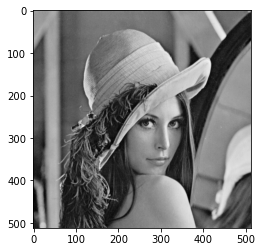

In [4]:
import matplotlib.pyplot as plt
# defining block size
block_size = 8

# Quantization Matrix 
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])

# reading image in grayscale style
img = cv2.imread(r'C:\Users\maths\Downloads\lenna.tif', 0)

# get size of the image
[h , w] = img.shape # 128x128

#.................................... No of blocks...............................................

height = h
width = w  
h = np.float32(h)
w = np.float32(w) 

nbh = math.ceil(h/block_size) 
nbh = np.int32(nbh)

nbw = math.ceil(w/block_size) 
nbw = np.int32(nbw) 


#................... Padding image for image size not divisible by 8.............................



H =  block_size * nbh 

W =  block_size * nbw 

# create a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))

padded_img[0:height,0:width] = img[0:height,0:width]

cv2.imwrite('uncompressed.bmp', np.uint8(padded_img))
a = plt.imread('uncompressed.bmp')
plt.imshow(a.astype('uint8'), cmap = 'gray')
plt.show()

In [5]:
# start encoding:
# divide image into block size by block size (here: 8-by-8) blocks
# To each block apply 2D discrete cosine transform
# reorder DCT coefficients in zig-zag order
# reshaped it back to block size by block size (here: 8-by-8)

for i in range(nbh):
    
        # Compute start and end row index of the block
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Compute start & end column index of the block
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size
                        
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
                       
            # apply 2D discrete cosine transform to the selected block                       
            DCT = cv2.dct(block)            

            DCT_normalized = np.divide(DCT,QUANTIZATION_MAT).astype(int)            
            
            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            reordered = zigzag(DCT_normalized) #Zig-Zag function defined above

            # reshape the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (block_size, block_size)) 
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped       

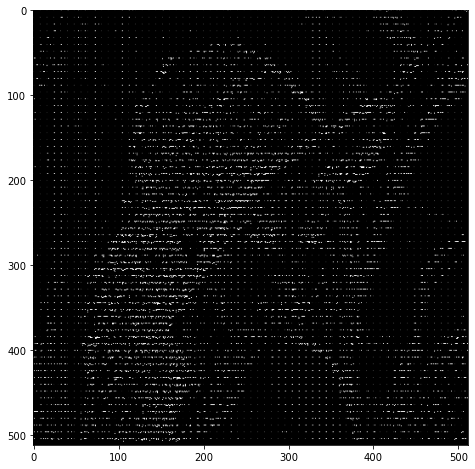

The size of image without thresholding is 87.6 KB
The size of image with thresholding is 50.278 KB


In [6]:


#.................................Showing DCT image.............................................



plt.figure(figsize=(8, 8))
plt.imshow(np.uint8(padded_img), cmap = 'gray')
plt.show()
arranged = padded_img.flatten()

#............................Thresholding(set negative numbers to zero)..........................




arranged_thresh = arranged.copy()
for index,num in enumerate(arranged):
    if num<=0:
        arranged_thresh[index] =0

        

bitstream = get_run_length_encoding(arranged) 
bitstream_thresh = get_run_length_encoding(arranged_thresh)
# _,bitstream = huff_encode(bitstream) #not using huffman as it is increasing size to 136 Kb

# Two terms are assigned for size as well, semicolon denotes end of image to reciever

bitstream = str(padded_img.shape[0]) + " " + str(padded_img.shape[1]) + " " + bitstream + ";"
bitstream_thresh = str(padded_img.shape[0]) + " " + str(padded_img.shape[1]) + " " + bitstream_thresh + ";"




#.............................Save compressed file as text file..................................


# wihtout threshold
file1 = open("image.txt","w")
file1.write(bitstream)
file1.close()

#with threshold
file1 = open("image_thresh.txt","w")
file1.write(bitstream_thresh)
file1.close()

#...............................Getting Size of compressed Text...................................

file_size = os.path.getsize("image.txt")
print(f'The size of image without thresholding is {file_size/1000.0} KB')
file_size_thresh = os.path.getsize("image_thresh.txt")
print(f'The size of image with thresholding is {file_size_thresh/1000.0} KB')

In [7]:

#..................................Decoding the text file to Image...............................

file1 = open("image.txt","r")
compressed_image_text = file1.read()
file1.close()

In [8]:
padded_image = run_len_decode(compressed_image_text).reshape((H,W))
output_image = np.zeros((H,W))

In [9]:

#................................Reversing DCT to original Image.................................

for i in range(nbh):
    
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size

#...........................................8x8 blocks...........................................

            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
    
#...........................................Inverse ZigZag.......................................

            ordered = dezigzag(block)
    
#...........................................Dequantizing.........................................

            IDCT_denormalized = np.multiply(ordered,QUANTIZATION_MAT)

#...........................................Inverse DCT..........................................

            IDCT = cv2.idct(IDCT_denormalized)                        

            output_image[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = IDCT     

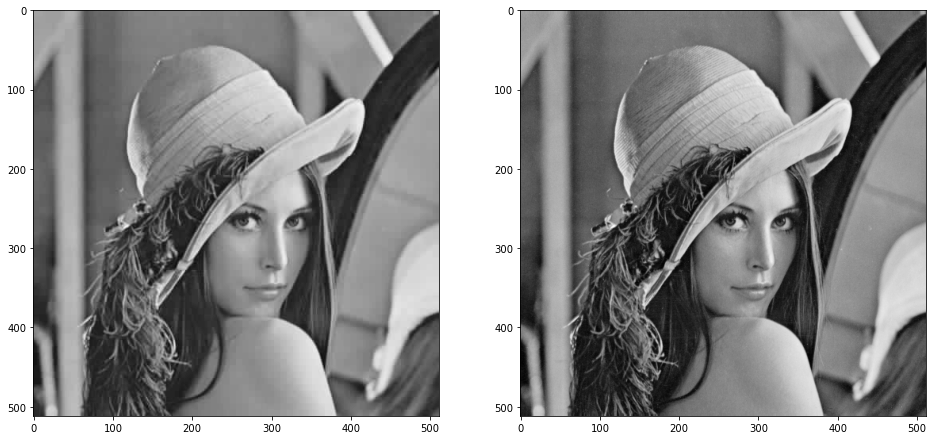

In [10]:
#...............................Displaying normal and compressed Image...........................

plt.subplots(figsize = (16,16))
plt.subplot(1,2,1)
plt.imshow(output_image.astype('uint8'),cmap ='gray')
plt.subplot(1,2,2)
plt.imshow(img,cmap ='gray')
plt.show()

In [11]:

#.....................................Saving Image in Disk........................................

cv2.imwrite('lenna_without_opencv.jpg', output_image)

True

### Jpeg Compression - Encoding and Decoding using OPEN CV

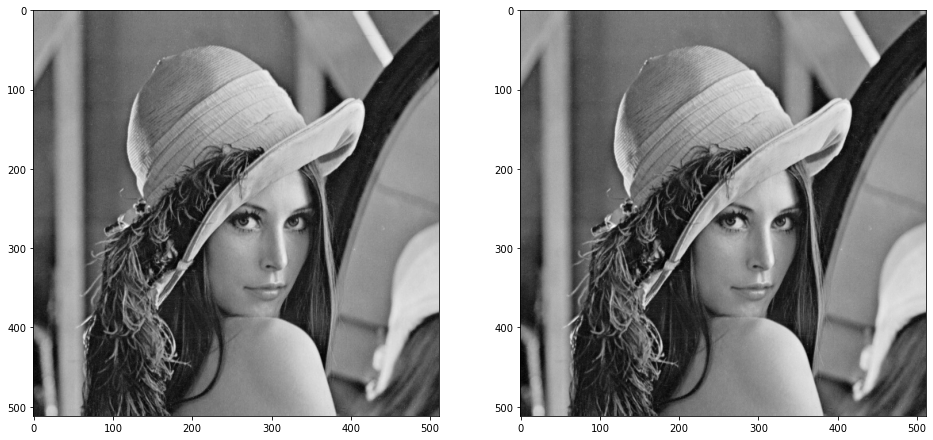

In [12]:
img = cv2.imread(r'C:\Users\maths\Downloads\lenna.tif',0)
cv2.imwrite("lenna_compressed_opencv.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
im_comp = cv2.imread(r'C:\Users\maths\Downloads\lenna_compressed_opencv.jpg',0)
plt.subplots(figsize = (16,16))
plt.subplot(1,2,1)
plt.imshow(im_comp,cmap ='gray')
plt.subplot(1,2,2)
plt.imshow(img,cmap ='gray')
plt.show()

In [13]:

#...................................Function for PSNR and RMSE...................................

from math import log10, sqrt
def PSNR_RMSE(img1, img2):   
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    rmse= sqrt(mse)  ## Root mean square 
    psnr = 20 *log10(max_pixel /rmse)
    return psnr,rmse

In [14]:

#...............................Getting Size of compressed Images................................

file_size_without_cv = os.path.getsize("lenna_without_opencv.jpg")
file_size_cv = os.path.getsize("lenna_compressed_opencv.jpg")

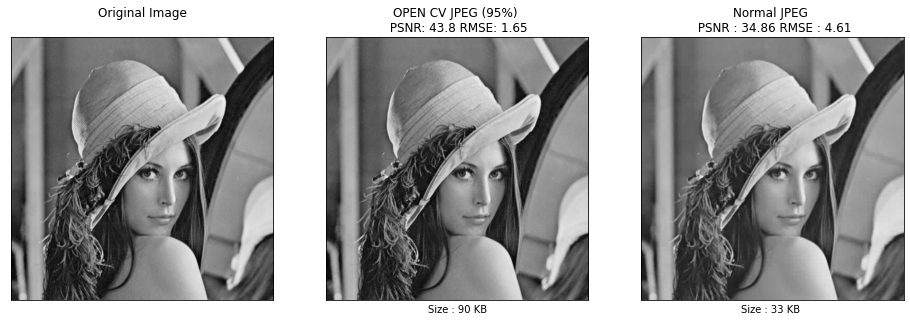

In [15]:
#.............Displaying and Comparing compressed Images with and without OpenCV.................

psnr_wihout_cv,rmse_without_cv = PSNR_RMSE(img, output_image.astype('uint8'))
psnr_cv,rmse_cv = PSNR_RMSE(img,im_comp)

plt.subplots(figsize = (16,16))
plt.subplot(1,3,1)
plt.imshow(img,cmap ='gray')
plt.xticks([]),plt.yticks([])
plt.title(f'Original Image\n')

plt.subplot(1,3,2)
plt.imshow(im_comp,cmap ='gray')
plt.xticks([]),plt.yticks([])
plt.title(f'OPEN CV JPEG (95%) \n PSNR: {np.round(psnr_cv,2)} RMSE: {np.round(rmse_cv,2)}')
plt.xlabel(f'Size : {file_size_cv//1000} KB')

plt.subplot(1,3,3)
plt.imshow(output_image.astype('uint8'),cmap ='gray')
plt.xticks([]),plt.yticks([])
plt.title(f'Normal JPEG \n PSNR : {np.round(psnr_wihout_cv,2)} RMSE : {np.round(rmse_without_cv,2)}')
plt.xlabel(f'Size : {file_size_without_cv//1000} KB ')

plt.show()